# Preliminaries

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [100]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

warnings.filterwarnings('ignore')

# Data Extraction

In [101]:
path = "./Resources/Datasets"
SalesData = pd.read_csv(path + '/sales_data.csv')
WeekData = pd.read_csv(path + '/week_data.csv')
ProductData = pd.read_csv(path + '/product_data.csv')
OutletsData = pd.read_csv(path + '/outlets_data.csv')
FreezerData = pd.read_csv(path + '/freezer_data.csv')

In [102]:
WeekData['Week'] = WeekData['Week'].str.replace('Week ', '').astype(int)
#rename the column to 'week'
WeekData.rename(columns={'Week':'week'}, inplace=True)

In [103]:
CombinedData = pd.merge(SalesData, WeekData, left_on='week', right_on='week')
CombinedData.drop(['product_name'], axis=1, inplace=True)
CombinedData = pd.merge(CombinedData, ProductData, on='pid')
CombinedData = pd.merge(CombinedData, OutletsData, on='Outlet_ID')

In [104]:
CombinedData.head()

,Outlet_ID,week,pid,no_units,Start Date,End Date,volume,product_name,price,area(sqft)
0,ID7203,1,IP1,874.0,1/2/2023,1/8/2023,0.2,Vanilla Mini Cone,100,5660
1,ID7203,2,IP1,644.0,1/9/2023,1/15/2023,0.2,Vanilla Mini Cone,100,5660
2,ID7203,3,IP1,600.0,1/16/2023,1/22/2023,0.2,Vanilla Mini Cone,100,5660
3,ID7203,4,IP1,106.0,1/23/2023,1/29/2023,0.2,Vanilla Mini Cone,100,5660
4,ID7203,5,IP1,775.0,1/30/2023,2/5/2023,0.2,Vanilla Mini Cone,100,5660


# Analysis

<AxesSubplot: >

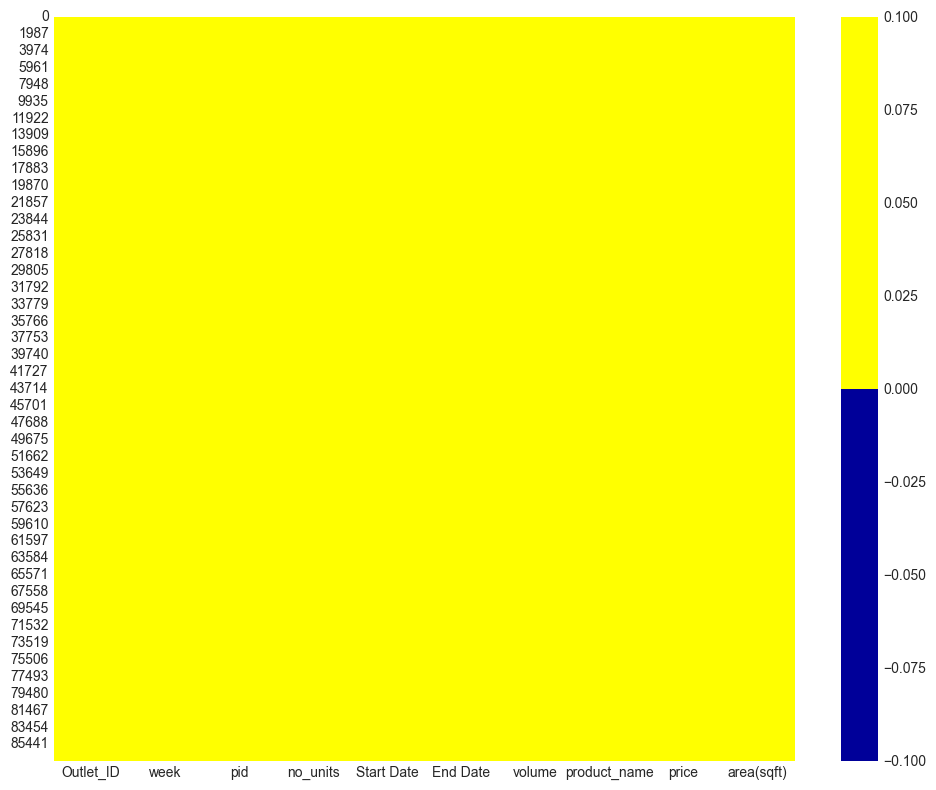

In [105]:
plt.figure(figsize=(10,8))
cols = CombinedData.columns
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(CombinedData[cols].isna(), cmap=sns.color_palette(colours))

No missing data

# Preprocessing

In [106]:
from datetime import datetime
import os

def clean_data(CombinedData):
    # Drop duplicate rows across all columns
    CombinedData = CombinedData.drop_duplicates()
    # Derive column 'start_month' from column: 'Start Date'
    
    def start_month(Start_Date):
        """
        Transform "Start_Date" as per the following examples:
          1/2/2023 ==> 1
        """
        date1 = datetime.strptime(Start_Date, "%m/%d/%Y")
        date_format1 = '%-m' if os.name != 'nt' else '%#m'
        return date1.strftime(date_format1)
    
    CombinedData.insert(5, "start_month", CombinedData.apply(lambda row : start_month(row["Start Date"]), axis=1))
    # Derive column 'start_date' from column: 'Start Date'
    
    def start_date(Start_Date):
        """
        Transform "Start_Date" as per the following examples:
          1/2/2023 ==> 2
        """
        date1 = datetime.strptime(Start_Date, "%m/%d/%Y")
        date_format1 = '%-d' if os.name != 'nt' else '%#d'
        return date1.strftime(date_format1)
    
    CombinedData.insert(5, "start_date", CombinedData.apply(lambda row : start_date(row["Start Date"]), axis=1))
    # Drop column: 'Start Date'
    CombinedData = CombinedData.drop(columns=['Start Date'])
    # Derive column 'end_month' from column: 'End Date'
    
    def end_month(End_Date):
        """
        Transform "End_Date" as per the following examples:
          1/8/2023 ==> 1
        """
        date1 = datetime.strptime(End_Date, "%m/%d/%Y")
        date_format1 = '%-m' if os.name != 'nt' else '%#m'
        return date1.strftime(date_format1)
    
    CombinedData.insert(7, "end_month", CombinedData.apply(lambda row : end_month(row["End Date"]), axis=1))
    # Derive column 'end_date' from column: 'End Date'
    
    def end_date(End_Date):
        """
        Transform "End_Date" as per the following examples:
          1/8/2023 ==> 8
        """
        date1 = datetime.strptime(End_Date, "%m/%d/%Y")
        date_format1 = '%-d' if os.name != 'nt' else '%#d'
        return date1.strftime(date_format1)
    
    CombinedData.insert(7, "end_date", CombinedData.apply(lambda row : end_date(row["End Date"]), axis=1))
    # Drop column: 'End Date'
    CombinedData = CombinedData.drop(columns=['End Date'])
    return CombinedData

CombinedData_clean = clean_data(CombinedData.copy())


In [107]:
CombinedData_clean.head()

,Outlet_ID,week,pid,no_units,start_date,start_month,end_date,end_month,volume,product_name,price,area(sqft)
0,ID7203,1,IP1,874.0,2,1,8,1,0.2,Vanilla Mini Cone,100,5660
1,ID7203,2,IP1,644.0,9,1,15,1,0.2,Vanilla Mini Cone,100,5660
2,ID7203,3,IP1,600.0,16,1,22,1,0.2,Vanilla Mini Cone,100,5660
3,ID7203,4,IP1,106.0,23,1,29,1,0.2,Vanilla Mini Cone,100,5660
4,ID7203,5,IP1,775.0,30,1,5,2,0.2,Vanilla Mini Cone,100,5660


In [108]:
def clean_data(CombinedData_clean):
    # Drop column: 'pid'
    CombinedData_clean = CombinedData_clean.drop(columns=['pid'])
    # Drop column: 'end_month'
    CombinedData_clean = CombinedData_clean.drop(columns=['end_month'])
    # Drop column: 'end_date'
    CombinedData_clean = CombinedData_clean.drop(columns=['end_date'])
    # Drop column: 'start_month'
    CombinedData_clean = CombinedData_clean.drop(columns=['start_month'])
    # Drop column: 'start_date'
    CombinedData_clean = CombinedData_clean.drop(columns=['start_date'])
    return CombinedData_clean

CombinedData_clean_1 = clean_data(CombinedData_clean.copy())


In [109]:
CombinedData_clean_1.head()

,Outlet_ID,week,no_units,volume,product_name,price,area(sqft)
0,ID7203,1,874.0,0.2,Vanilla Mini Cone,100,5660
1,ID7203,2,644.0,0.2,Vanilla Mini Cone,100,5660
2,ID7203,3,600.0,0.2,Vanilla Mini Cone,100,5660
3,ID7203,4,106.0,0.2,Vanilla Mini Cone,100,5660
4,ID7203,5,775.0,0.2,Vanilla Mini Cone,100,5660


# Feature Encoding

In [110]:
def clean_data(CombinedData_clean_1):
    # Drop duplicate rows across all columns
    CombinedData_clean_1 = CombinedData_clean_1.drop_duplicates()
    # Change column type to category for column: 'Outlet_ID'
    CombinedData_clean_1 = CombinedData_clean_1.astype({'Outlet_ID': 'category'})
    # Change column type to float64 for column: 'week'
    CombinedData_clean_1 = CombinedData_clean_1.astype({'week': 'float64'})
    # Change column type to int64 for column: 'no_units'
    CombinedData_clean_1 = CombinedData_clean_1.astype({'no_units': 'int64'})
    # Change column type to float64 for column: 'volume'
    CombinedData_clean_1 = CombinedData_clean_1.astype({'volume': 'float64'})
    # Change column type to category for column: 'product_name'
    CombinedData_clean_1 = CombinedData_clean_1.astype({'product_name': 'category'})
    # Change column type to object for column: 'product_name'
    CombinedData_clean_1 = CombinedData_clean_1.astype({'product_name': 'object'})
    # One-hot encode column: 'product_name'
    CombinedData_clean_1 = pd.get_dummies(CombinedData_clean_1, columns=['product_name'])
    # Derive column 'total_volume' from columns: 'no_units', 'volume'
    def total_volume(no_units, volume):
        """
        Transform "no_units", "volume" as per the following examples:
          874, 0.2 ==> 174.8
          644, 0.2 ==> 128.8
          106, 0.2 ==> 21.2
        """
        number1 = volume * no_units
        return f"{number1:03.1f}"
    
    CombinedData_clean_1.insert(4, "total_volume", CombinedData_clean_1.apply(lambda row : total_volume(row["no_units"], row["volume"]), axis=1))
    # Derive column 'total_price' from columns: 'no_units', 'price'
    def total_price(no_units, price):
        """
        Transform "no_units", "price" as per the following examples:
          874, 100 ==> 87400
          644, 100 ==> 64400
          105, 90 ==> 9450
        """
        number1 = price * no_units
        return f"{number1:01.0f}"
    
    CombinedData_clean_1.insert(6, "total_price", CombinedData_clean_1.apply(lambda row : total_price(row["no_units"], row["price"]), axis=1))
    # Derive column 'volume_per_price' from columns: 'total_volume', 'total_price'
    def volume_per_price(total_price, total_volume):
        """
        Transform "total_price", "total_volume" as per the following examples:
          64400, 128.8 ==> 500
          64400, 128.8 ==> 500
          87400, 174.8 ==> 500
        """
        number1 = float(total_price.replace(",", "")) / float(total_volume.replace(",", ""))
        return f"{number1:01.0f}"
    
    CombinedData_clean_1.insert(7, "volume_per_price", CombinedData_clean_1.apply(lambda row : volume_per_price(row["total_price"], row["total_volume"]), axis=1))
    return CombinedData_clean_1

CombinedData_clean_2 = clean_data(CombinedData_clean_1.copy())


In [111]:
CombinedData_clean_2.head()

,Outlet_ID,week,no_units,volume,total_volume,price,total_price,volume_per_price,area(sqft),product_name_Butter Pecan Small Stick,product_name_Chocolate Fudge Big Scoop,product_name_Chocolate Petite Bar,product_name_Cookies and Cream Mega Tub,product_name_Mint Bite-size Pop,product_name_Mint Chocolate Chip Family Pack,product_name_Moose Tracks Jumbo Cup,product_name_Rocky Road Mega Tub,product_name_Strawberry Tiny Cup,product_name_Vanilla Mini Cone
0,ID7203,1.0,874,0.2,174.8,100,87400,500,5660,0,0,0,0,0,0,0,0,0,1
1,ID7203,2.0,644,0.2,128.8,100,64400,500,5660,0,0,0,0,0,0,0,0,0,1
2,ID7203,3.0,600,0.2,120.0,100,60000,500,5660,0,0,0,0,0,0,0,0,0,1
3,ID7203,4.0,106,0.2,21.2,100,10600,500,5660,0,0,0,0,0,0,0,0,0,1
4,ID7203,5.0,775,0.2,155.0,100,77500,500,5660,0,0,0,0,0,0,0,0,0,1


# Aggregation

In [112]:
def clean_data(CombinedData_clean_2):
    # Change column type to float64 for column: 'no_units'
    CombinedData_clean_2 = CombinedData_clean_2.astype({'no_units': 'float64'})
    # Change column type to float64 for column: 'total_volume'
    CombinedData_clean_2 = CombinedData_clean_2.astype({'total_volume': 'float64'})
    # Change column type to float64 for column: 'price'
    CombinedData_clean_2 = CombinedData_clean_2.astype({'price': 'float64'})
    # Change column type to float64 for column: 'price'
    CombinedData_clean_2 = CombinedData_clean_2.astype({'price': 'float64'})
    # Change column type to float64 for column: 'volume_per_price'
    CombinedData_clean_2 = CombinedData_clean_2.astype({'volume_per_price': 'float64'})
    # Change column type to float64 for column: 'area(sqft)'
    CombinedData_clean_2 = CombinedData_clean_2.astype({'area(sqft)': 'float64'})
    # Change column type to float64 for column: 'total_price'
    CombinedData_clean_2 = CombinedData_clean_2.astype({'total_price': 'float64'})
    # Performed 19 aggregations grouped on column: 'Outlet_ID'
    CombinedData_clean_2 = CombinedData_clean_2.groupby(['Outlet_ID']).agg(week_skew=('week', 'skew'), no_units_mean=('no_units', 'mean'), volume_mode=('volume', lambda s: s.value_counts().index[0]), total_sales=('total_price', 'sum'), total_volume=('volume', 'sum'),
                                                                           total_volume_mean=('total_volume', 'mean'), price_max=('price', 'max'), price_mean=('price', 'mean'), total_price_mean=('total_price', 'mean'), volume_per_price_mean=('volume_per_price', 'mean'), areasqft_mode=('area(sqft)', lambda s: s.value_counts().index[0]), product_name_ButterPecanSmallStick_max=('product_name_Butter Pecan Small Stick', 'max'), product_name_ChocolateFudgeBigScoop_max=('product_name_Chocolate Fudge Big Scoop', 'max'), product_name_ChocolatePetiteBar_max=('product_name_Chocolate Petite Bar', 'max'), product_name_CookiesandCreamMegaTub_max=('product_name_Cookies and Cream Mega Tub', 'max'), product_name_MintBitesizePop_max=('product_name_Mint Bite-size Pop', 'max'), product_name_MintChocolateChipFamilyPack_max=('product_name_Mint Chocolate Chip Family Pack', 'max'), product_name_MooseTracksJumboCup_max=('product_name_Moose Tracks Jumbo Cup', 'max'), product_name_RockyRoadMegaTub_max=('product_name_Rocky Road Mega Tub', 'max'), product_name_StrawberryTinyCup_max=('product_name_Strawberry Tiny Cup', 'max'), product_name_VanillaMiniCone_max=('product_name_Vanilla Mini Cone', 'max')).reset_index()
    return CombinedData_clean_2

CombinedData_clean_3 = clean_data(CombinedData_clean_2.copy())


In [113]:
CombinedData_clean_3.head()

,Outlet_ID,week_skew,no_units_mean,volume_mode,total_sales,total_volume,total_volume_mean,price_max,price_mean,total_price_mean,...,product_name_ButterPecanSmallStick_max,product_name_ChocolateFudgeBigScoop_max,product_name_ChocolatePetiteBar_max,product_name_CookiesandCreamMegaTub_max,product_name_MintBitesizePop_max,product_name_MintChocolateChipFamilyPack_max,product_name_MooseTracksJumboCup_max,product_name_RockyRoadMegaTub_max,product_name_StrawberryTinyCup_max,product_name_VanillaMiniCone_max
0,ID1008,0.050093,589.321429,0.2,3290990.0,11.2,117.864286,110.0,99.642857,58767.678571,...,1,0,1,0,1,0,0,0,1,1
1,ID1012,0.004224,60.648148,1.0,3648650.0,54.0,60.648148,1200.0,1112.962963,67567.592593,...,0,1,0,1,0,1,1,1,0,0
2,ID1024,-0.034795,126.236364,1.0,7726300.0,55.0,126.236364,1200.0,1110.909091,140478.181818,...,0,1,0,1,0,1,1,1,0,0
3,ID1029,0.000406,472.519231,0.2,13401160.0,60.0,158.826923,1200.0,575.096154,128857.307692,...,1,1,1,1,1,1,1,1,1,1
4,ID1036,0.071437,287.743119,0.2,6338870.0,64.2,80.748624,1200.0,590.825688,58154.770642,...,1,1,1,1,1,1,1,1,1,1


# Feature Scaling

In [114]:
def clean_data(CombinedData_clean_3):
    # Scale columns 'week_skew', 'no_units_mean' and 9 other columns between 0 and 1
    new_min, new_max = 0, 1
    old_min, old_max = CombinedData_clean_3['week_skew'].min(), CombinedData_clean_3['week_skew'].max()
    CombinedData_clean_3['week_skew'] = (CombinedData_clean_3['week_skew'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = CombinedData_clean_3['no_units_mean'].min(), CombinedData_clean_3['no_units_mean'].max()
    CombinedData_clean_3['no_units_mean'] = (CombinedData_clean_3['no_units_mean'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = CombinedData_clean_3['volume_mode'].min(), CombinedData_clean_3['volume_mode'].max()
    CombinedData_clean_3['volume_mode'] = (CombinedData_clean_3['volume_mode'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = CombinedData_clean_3['total_sales'].min(), CombinedData_clean_3['total_sales'].max()
    CombinedData_clean_3['total_sales'] = (CombinedData_clean_3['total_sales'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = CombinedData_clean_3['total_volume'].min(), CombinedData_clean_3['total_volume'].max()
    CombinedData_clean_3['total_volume'] = (CombinedData_clean_3['total_volume'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = CombinedData_clean_3['total_volume_mean'].min(), CombinedData_clean_3['total_volume_mean'].max()
    CombinedData_clean_3['total_volume_mean'] = (CombinedData_clean_3['total_volume_mean'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = CombinedData_clean_3['price_max'].min(), CombinedData_clean_3['price_max'].max()
    CombinedData_clean_3['price_max'] = (CombinedData_clean_3['price_max'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = CombinedData_clean_3['price_mean'].min(), CombinedData_clean_3['price_mean'].max()
    CombinedData_clean_3['price_mean'] = (CombinedData_clean_3['price_mean'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = CombinedData_clean_3['total_price_mean'].min(), CombinedData_clean_3['total_price_mean'].max()
    CombinedData_clean_3['total_price_mean'] = (CombinedData_clean_3['total_price_mean'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = CombinedData_clean_3['volume_per_price_mean'].min(), CombinedData_clean_3['volume_per_price_mean'].max()
    CombinedData_clean_3['volume_per_price_mean'] = (CombinedData_clean_3['volume_per_price_mean'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = CombinedData_clean_3['areasqft_mode'].min(), CombinedData_clean_3['areasqft_mode'].max()
    CombinedData_clean_3['areasqft_mode'] = (CombinedData_clean_3['areasqft_mode'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    return CombinedData_clean_3

CombinedData_clean_4 = clean_data(CombinedData_clean_3.copy())
CombinedData_clean_4.head()

,Outlet_ID,week_skew,no_units_mean,volume_mode,total_sales,total_volume,total_volume_mean,price_max,price_mean,total_price_mean,...,product_name_ButterPecanSmallStick_max,product_name_ChocolateFudgeBigScoop_max,product_name_ChocolatePetiteBar_max,product_name_CookiesandCreamMegaTub_max,product_name_MintBitesizePop_max,product_name_MintChocolateChipFamilyPack_max,product_name_MooseTracksJumboCup_max,product_name_RockyRoadMegaTub_max,product_name_StrawberryTinyCup_max,product_name_VanillaMiniCone_max
0,ID1008,0.595413,0.739831,0.0,0.024374,0.004454,0.509691,0.0,0.000238,0.212937,...,1,0,1,0,1,0,0,0,1,1
1,ID1012,0.477199,0.013260,1.0,0.029648,0.123608,0.073546,1.0,0.994208,0.285490,...,0,1,0,1,0,1,1,1,0,0
2,ID1024,0.376639,0.103400,1.0,0.089766,0.126392,0.573510,1.0,0.992193,0.886623,...,0,1,0,1,0,1,1,1,0,0
3,ID1029,0.467359,0.579306,0.0,0.173434,0.140312,0.821940,1.0,0.466612,0.790812,...,1,1,1,1,1,1,1,1,1,1
4,ID1036,0.650423,0.325363,0.0,0.069311,0.152004,0.226767,1.0,0.482041,0.207884,...,1,1,1,1,1,1,1,1,1,1


In [115]:
def clean_data(CombinedData_clean_4):
    # Derive column 'ID' from column: 'Outlet_ID'
    # Transform "Outlet_ID" as per the following examples:
    #   ID1008 ==> 1008
    CombinedData_clean_4.insert(1, "ID", CombinedData_clean_4["Outlet_ID"].str[2:])
    # Drop column: 'Outlet_ID'
    CombinedData_clean_4 = CombinedData_clean_4.drop(columns=['Outlet_ID'])
    # Change column type to category for column: 'ID'
    CombinedData_clean_4 = CombinedData_clean_4.astype({'ID': 'category'})
    # Drop column: 'ID'
    CombinedData_clean_4 = CombinedData_clean_4.drop(columns=['ID'])
    return CombinedData_clean_4

CombinedData_clean_5 = clean_data(CombinedData_clean_4.copy())
CombinedData_clean_5.head()

,week_skew,no_units_mean,volume_mode,total_sales,total_volume,total_volume_mean,price_max,price_mean,total_price_mean,volume_per_price_mean,...,product_name_ButterPecanSmallStick_max,product_name_ChocolateFudgeBigScoop_max,product_name_ChocolatePetiteBar_max,product_name_CookiesandCreamMegaTub_max,product_name_MintBitesizePop_max,product_name_MintChocolateChipFamilyPack_max,product_name_MooseTracksJumboCup_max,product_name_RockyRoadMegaTub_max,product_name_StrawberryTinyCup_max,product_name_VanillaMiniCone_max
0,0.595413,0.739831,0.0,0.024374,0.004454,0.509691,0.0,0.000238,0.212937,0.001953,...,1,0,1,0,1,0,0,0,1,1
1,0.477199,0.013260,1.0,0.029648,0.123608,0.073546,1.0,0.994208,0.285490,0.990504,...,0,1,0,1,0,1,1,1,0,0
2,0.376639,0.103400,1.0,0.089766,0.126392,0.573510,1.0,0.992193,0.886623,0.987202,...,0,1,0,1,0,1,1,1,0,0
3,0.467359,0.579306,0.0,0.173434,0.140312,0.821940,1.0,0.466612,0.790812,0.466368,...,1,1,1,1,1,1,1,1,1,1
4,0.650423,0.325363,0.0,0.069311,0.152004,0.226767,1.0,0.482041,0.207884,0.481341,...,1,1,1,1,1,1,1,1,1,1


In [116]:
def clean_data(CombinedData_clean_5):
    # Change column type to category for column: 'product_name_ButterPecanSmallStick_max'
    CombinedData_clean_5 = CombinedData_clean_5.astype({'product_name_ButterPecanSmallStick_max': 'category'})
    # Change column type to category for column: 'product_name_ChocolateFudgeBigScoop_max'
    CombinedData_clean_5 = CombinedData_clean_5.astype({'product_name_ChocolateFudgeBigScoop_max': 'category'})
    # Change column type to category for column: 'product_name_ChocolatePetiteBar_max'
    CombinedData_clean_5 = CombinedData_clean_5.astype({'product_name_ChocolatePetiteBar_max': 'category'})
    # Change column type to category for column: 'product_name_MintBitesizePop_max'
    CombinedData_clean_5 = CombinedData_clean_5.astype({'product_name_MintBitesizePop_max': 'category'})
    # Change column type to category for column: 'product_name_CookiesandCreamMegaTub_max'
    CombinedData_clean_5 = CombinedData_clean_5.astype({'product_name_CookiesandCreamMegaTub_max': 'category'})
    # Change column type to category for column: 'product_name_MintChocolateChipFamilyPack_max'
    CombinedData_clean_5 = CombinedData_clean_5.astype({'product_name_MintChocolateChipFamilyPack_max': 'category'})
    # Change column type to category for column: 'product_name_MooseTracksJumboCup_max'
    CombinedData_clean_5 = CombinedData_clean_5.astype({'product_name_MooseTracksJumboCup_max': 'category'})
    # Change column type to category for column: 'product_name_RockyRoadMegaTub_max'
    CombinedData_clean_5 = CombinedData_clean_5.astype({'product_name_RockyRoadMegaTub_max': 'category'})
    # Change column type to category for column: 'product_name_StrawberryTinyCup_max'
    CombinedData_clean_5 = CombinedData_clean_5.astype({'product_name_StrawberryTinyCup_max': 'category'})
    # Change column type to category for column: 'product_name_VanillaMiniCone_max'
    CombinedData_clean_5 = CombinedData_clean_5.astype({'product_name_VanillaMiniCone_max': 'category'})
    return CombinedData_clean_5

CombinedData_clean_6 = clean_data(CombinedData_clean_5.copy())
CombinedData_clean_6.head()

,week_skew,no_units_mean,volume_mode,total_sales,total_volume,total_volume_mean,price_max,price_mean,total_price_mean,volume_per_price_mean,...,product_name_ButterPecanSmallStick_max,product_name_ChocolateFudgeBigScoop_max,product_name_ChocolatePetiteBar_max,product_name_CookiesandCreamMegaTub_max,product_name_MintBitesizePop_max,product_name_MintChocolateChipFamilyPack_max,product_name_MooseTracksJumboCup_max,product_name_RockyRoadMegaTub_max,product_name_StrawberryTinyCup_max,product_name_VanillaMiniCone_max
0,0.595413,0.739831,0.0,0.024374,0.004454,0.509691,0.0,0.000238,0.212937,0.001953,...,1,0,1,0,1,0,0,0,1,1
1,0.477199,0.013260,1.0,0.029648,0.123608,0.073546,1.0,0.994208,0.285490,0.990504,...,0,1,0,1,0,1,1,1,0,0
2,0.376639,0.103400,1.0,0.089766,0.126392,0.573510,1.0,0.992193,0.886623,0.987202,...,0,1,0,1,0,1,1,1,0,0
3,0.467359,0.579306,0.0,0.173434,0.140312,0.821940,1.0,0.466612,0.790812,0.466368,...,1,1,1,1,1,1,1,1,1,1
4,0.650423,0.325363,0.0,0.069311,0.152004,0.226767,1.0,0.482041,0.207884,0.481341,...,1,1,1,1,1,1,1,1,1,1


# Metrics

In [117]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, BisectingKMeans

def score_segmentation(model, X):
    # Calculate inertia for K-means clustering
    if isinstance(model, (KMeans|BisectingKMeans)):
        model.fit(X)
        inertia = model.inertia_
    else:
        inertia = None

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, model.labels_)

    # Calculate Davies-Bouldin index
    db_index = davies_bouldin_score(X, model.labels_)

    # Calculate Calinski-Harabasz index
    ch_index = calinski_harabasz_score(X, model.labels_)

    # Print the evaluation scores
    print(f"Inertia: {inertia}")
    print(f"Silhouette Coefficient: {silhouette_avg}")
    print(f"Davies-Bouldin Index: {db_index}")
    print(f"Calinski-Harabasz Index: {ch_index}")

# Visualization

In [118]:
from sklearn.decomposition import PCA

def plot_clusters(model, X):
    # Fit the clustering model to the data
    model.fit(X)

    # Get the cluster labels
    labels = model.labels_

    # Perform dimensionality reduction using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Create a scatter plot of the data colored by cluster label
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='bright')

    # Set the plot title and axis labels
    plt.title('Cluster Plot')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    # Show the plot
    plt.show()


# Baseline Scores

In [119]:
# from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, BisectingKMeans, AgglomerativeClustering, DBSCAN

# Fit and predict using K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(CombinedData_clean_6)
kmeans_pred = kmeans.predict(CombinedData_clean_6)

# Evaluate the K-means model
print("K-Means Clustering Results:")
score_segmentation(kmeans, CombinedData_clean_6)
print()

K-Means Clustering Results:
Inertia: 372.9663894301932
Silhouette Coefficient: 0.7047024545313092
Davies-Bouldin Index: 0.4783738681781626
Calinski-Harabasz Index: 3010.3785715974595



In [120]:
# Define the model and its parameters
bkmeans = BisectingKMeans(n_clusters=3, random_state=42)

# Fit the model to the data
bkmeans.fit(CombinedData_clean_6)
bkmeans_pred = bkmeans.predict(CombinedData_clean_6)

# Evaluate the K-means model
print("Bisecting K-Means Clustering Results:")
score_segmentation(bkmeans, CombinedData_clean_6)
print()

Bisecting K-Means Clustering Results:
Inertia: 372.9663894301933
Silhouette Coefficient: 0.7047024545313092
Davies-Bouldin Index: 0.4783738681781626
Calinski-Harabasz Index: 3010.3785715974595



In [121]:

# Perform Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_pred = agglo.fit_predict(CombinedData_clean_6)

# Evaluate the Agglomerative model
print("Agglomerative Clustering Results:")
score_segmentation(agglo, CombinedData_clean_6)
print()


Agglomerative Clustering Results:
Inertia: None
Silhouette Coefficient: 0.7047024545313092
Davies-Bouldin Index: 0.4783738681781626
Calinski-Harabasz Index: 3010.3785715974595



In [122]:
# Perform DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_pred = dbscan.fit_predict(CombinedData_clean_6)

# Evaluate the DBSCAN model
print("DBSCAN Clustering Results:")
score_segmentation(dbscan, CombinedData_clean_6)

DBSCAN Clustering Results:
Inertia: None
Silhouette Coefficient: 0.6167373520913254
Davies-Bouldin Index: 0.9591958665585725
Calinski-Harabasz Index: 2688.300795258895


We will use kmeans or bisecting kmeans for further studies as we require a inertia score

# Feature Engineering

## Covariance

In [123]:
corr = CombinedData_clean_6.corr()
corr.style.background_gradient(cmap='coolwarm')

,week_skew,no_units_mean,volume_mode,total_sales,total_volume,total_volume_mean,price_max,price_mean,total_price_mean,volume_per_price_mean,areasqft_mode
week_skew,1.000000,0.056955,-0.030020,0.010825,0.004252,0.024153,-0.014526,-0.035293,-0.013975,-0.035234,0.007068
no_units_mean,0.056955,1.000000,-0.633307,0.136268,-0.268802,0.623211,-0.596748,-0.841257,0.008922,-0.841086,0.294890
volume_mode,-0.030020,-0.633307,1.000000,0.121981,0.336509,-0.163739,0.574708,0.723947,0.289678,0.723933,0.070058
total_sales,0.010825,0.136268,0.121981,1.000000,0.847746,0.522751,0.451463,0.158081,0.560886,0.158237,0.438718
total_volume,0.004252,-0.268802,0.336509,0.847746,1.000000,0.058743,0.614437,0.400708,0.286727,0.400716,0.173056
total_volume_mean,0.024153,0.623211,-0.163739,0.522751,0.058743,1.000000,0.036885,-0.157121,0.787546,-0.156807,0.692329
price_max,-0.014526,-0.596748,0.574708,0.451463,0.614437,0.036885,1.000000,0.815469,0.517351,0.815524,0.193654
price_mean,-0.035293,-0.841257,0.723947,0.158081,0.400708,-0.157121,0.815469,1.000000,0.461913,0.999988,0.093016
total_price_mean,-0.013975,0.008922,0.289678,0.560886,0.286727,0.787546,0.517351,0.461913,1.000000,0.462205,0.652750
volume_per_price_mean,-0.035234,-0.841086,0.723933,0.158237,0.400716,-0.156807,0.815524,0.999988,0.462205,1.000000,0.093319


In [124]:
#pair plot of all variables

# sns.pairplot(CombinedData_clean_6)

## PCA

In [125]:
def apply_pca(X):
  pca= PCA()
  X_pca = pca.fit_transform(X)
  component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
  X_pca = pd.DataFrame(X_pca, columns=component_names)
  #create loadings
  loadings = pd.DataFrame(
      pca.components_.T,
      columns = component_names,
      index=X.columns,
  )
  return pca, X_pca, loadings

def plot_variance(pca, width=8, dpi=100):
  fig, axs = plt.subplots(1,2)
  n = pca.n_components_
  grid = np.arange(1, n+1)
  evr = pca.explained_variance_ratio_
  axs[0].bar(grid,evr)
  axs[0].set(
      xlabel="Component",title="% Explained Variance", ylim=(0.0,1.0)             )
  #Cumulative Variance
  cv = np.cumsum(evr)
  axs[1].plot(np.r_[0,grid], np.r_[0,cv], "o-")
  axs[1].set(xlabel="Component", title="% Cumulatve Variance", ylim=(0.0, 1.0))
  fig.set(figwidth=8, dpi=100)
  return axs

In [126]:
pca, X_pca, loadings = apply_pca(CombinedData_clean_6)
print(loadings)

                                                   PC1       PC2       PC3  \
week_skew                                     0.003764 -0.005169 -0.001893   
no_units_mean                                 0.166090 -0.089310 -0.263433   
volume_mode                                  -0.280457  0.042210  0.105064   
total_sales                                  -0.015532 -0.076103 -0.080156   
total_volume                                 -0.037341 -0.068368  0.020291   
total_volume_mean                             0.029096 -0.141078 -0.593877   
price_max                                    -0.276925 -0.256189  0.052458   
price_mean                                   -0.257070  0.034549 -0.011490   
total_price_mean                             -0.112231 -0.111072 -0.570401   
volume_per_price_mean                        -0.254479  0.034129 -0.011602   
areasqft_mode                                -0.020669 -0.086181 -0.429189   
product_name_ButterPecanSmallStick_max        0.239696 -0.329826

In [127]:
# TODO: make a drop features by loading function

In [128]:
# def drop_features_by_loading(data, loadings, threshold):
#     """
#     Drop features with loadings below the specified threshold using PCA.
    
#     Parameters:
#     data (DataFrame): The input data with features to be dropped.
#     threshold (float): The threshold below which to drop the features.
    
#     Returns:
#     DataFrame: The transformed data with dropped features.
#     """
#     # Fit a PCA model to the data
#     pca = PCA().fit(data)

#     # Get the absolute loadings for each feature
#     loadings = np.abs(pca.components_)

#     # Find the features with loadings below the threshold
#     low_loadings = np.where(loadings < threshold)
#     print(low_loadings)

#     # Flatten the index arrays to get the feature names
#     low_loading_features = [data.columns[i] for i in np.unique(low_loadings[1])]

#     # Drop the features with low loadings
#     transformed_data = data.drop(low_loading_features, axis=1)

#     return transformed_data

In [129]:
# # Drop features with low loadings
# CombinedData_clean_7 = drop_features_by_loading(CombinedData_clean_6, 0.005)
# CombinedData_clean_6.info()

## Dimensionality Reduction

In [130]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(CombinedData_clean_6)
# save the file to x_pca for further analysis
#convert from numpy array to dataframe
X_pca = pd.DataFrame(X_pca)
X_pca.to_csv('X_pca.csv', index=False)

In [131]:
kmeans.fit(X_pca)
kmeans_pred = kmeans.predict(X_pca)

# Evaluate the K-means model
print("K-Means Clustering Results:")
score_segmentation(kmeans, X_pca)
print()

K-Means Clustering Results:
Inertia: 21.757809848427293
Silhouette Coefficient: 0.9317720141845843
Davies-Bouldin Index: 0.10926298385106438
Calinski-Harabasz Index: 51530.16580057734



In [132]:
# Define the model and its parameters
bkmeans = BisectingKMeans(n_clusters=3, random_state=42)

# Fit the model to the data
bkmeans.fit(X_pca)
bkmeans_pred = bkmeans.predict(X_pca)

# Evaluate the K-means model
print("Bisecting K-Means Clustering Results:")
score_segmentation(bkmeans, X_pca)
print()

Bisecting K-Means Clustering Results:
Inertia: 21.7578098484273
Silhouette Coefficient: 0.9317720141845843
Davies-Bouldin Index: 0.10926298385106438
Calinski-Harabasz Index: 51530.16580057734



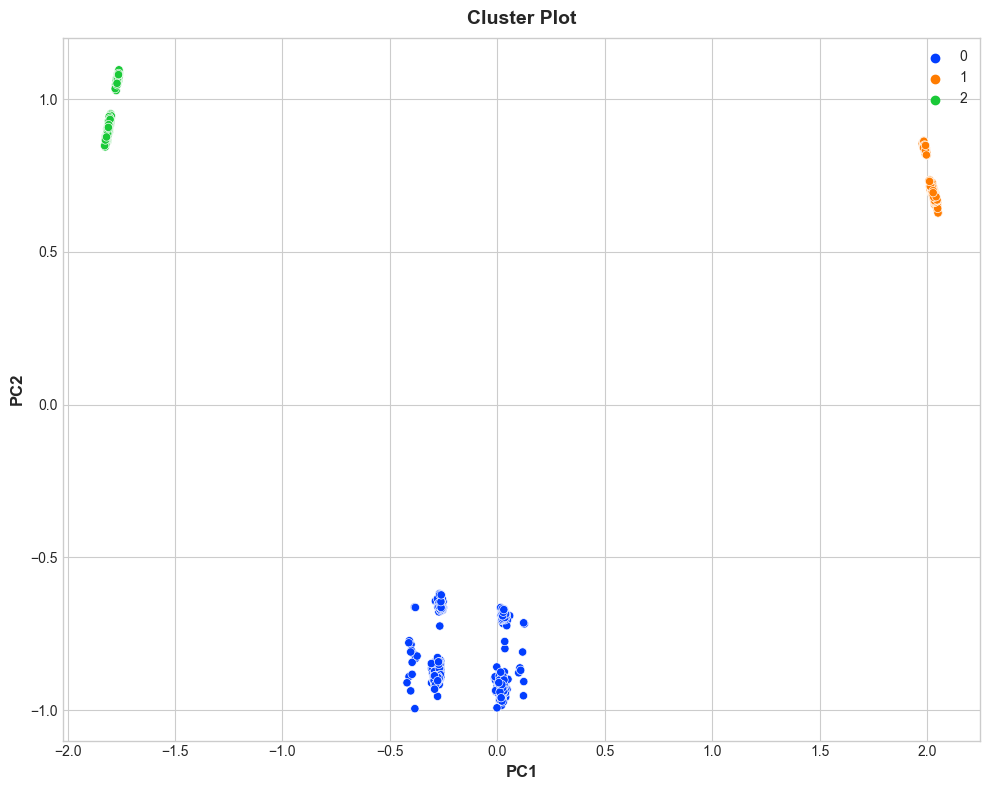

In [133]:
# plot the graph
plot_clusters(kmeans, X_pca)

Clustering is evident. However we can fine tune the hyperparameters.

# Hyperparameter Tuning

In [134]:
from sklearn.model_selection import GridSearchCV

def tune_kmeans(X, parameters):
    """
    Perform hyperparameter tuning for KMeans clustering using GridSearchCV.

    Parameters:
    X (array-like): The data to cluster.
    parameters (dict): A dictionary of hyperparameters and their potential values to tune.

    Returns:
    The best estimator found by GridSearchCV.
    """

    # Create a KMeans clustering model
    kmeans = KMeans()

    # Create a GridSearchCV object
    grid_search = GridSearchCV(kmeans, parameters, cv=5)

    # Fit the GridSearchCV object to the data
    grid_search.fit(X)

    # Return the best estimator found by GridSearchCV
    return grid_search.best_estimator_


In [135]:
parameters = {'n_clusters': [2, 3, 4, 5, 6], 'init': ['k-means++', 'random'], 'max_iter': [100, 200, 300]}
best_kmeans = tune_kmeans(X_pca, parameters)


In [136]:
# print(best_kmeans)

In [137]:
kmeans = KMeans(n_clusters=6, init='random', max_iter=300)

kmeans.fit(X_pca)
kmeans_pred = kmeans.predict(X_pca)

# Evaluate the K-means model
print("K-Means Clustering Results:")
score_segmentation(kmeans, X_pca)
print()

K-Means Clustering Results:
Inertia: 4.911094431242124
Silhouette Coefficient: 0.8127840721962398
Davies-Bouldin Index: 0.2809858171290031
Calinski-Harabasz Index: 91677.7788360545



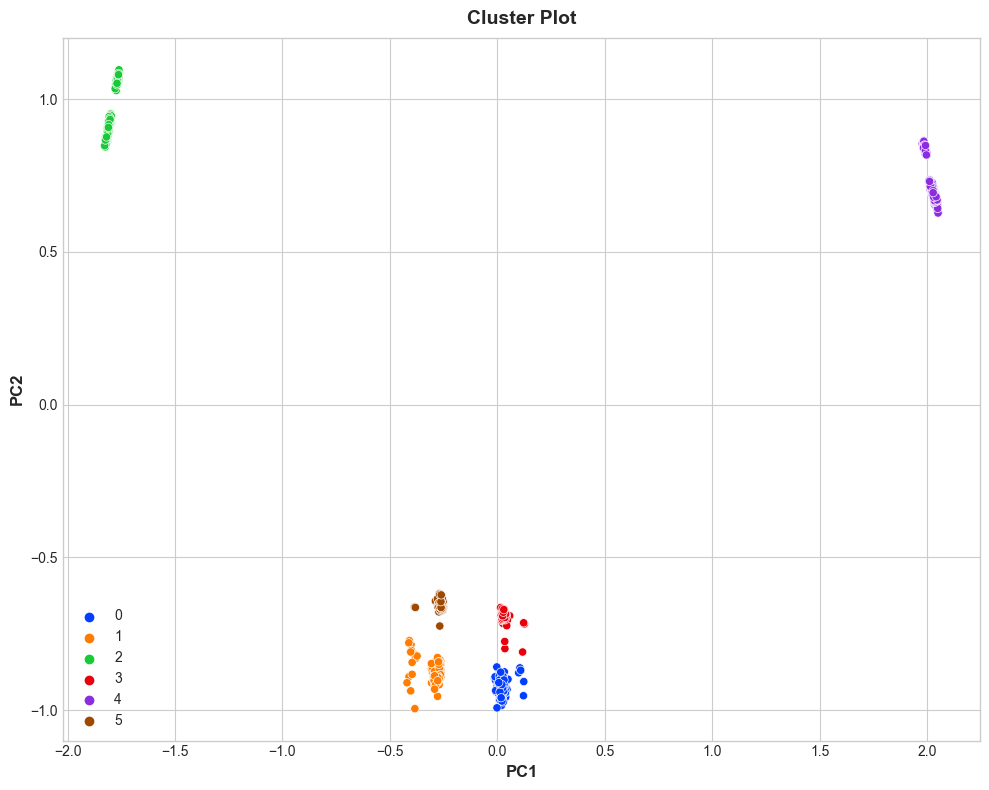

In [138]:
plot_clusters(kmeans, X_pca)

In [139]:
kmeans = KMeans(n_clusters=8, init='random', max_iter=300, random_state=100)

kmeans.fit(X_pca)
kmeans_pred = kmeans.predict(X_pca)

# Evaluate the K-means model
print("K-Means Clustering Results:")
score_segmentation(kmeans, X_pca)
print()

K-Means Clustering Results:
Inertia: 0.8303481386290549
Silhouette Coefficient: 0.8469059516665215
Davies-Bouldin Index: 0.19836874178602332
Calinski-Harabasz Index: 387148.260713933



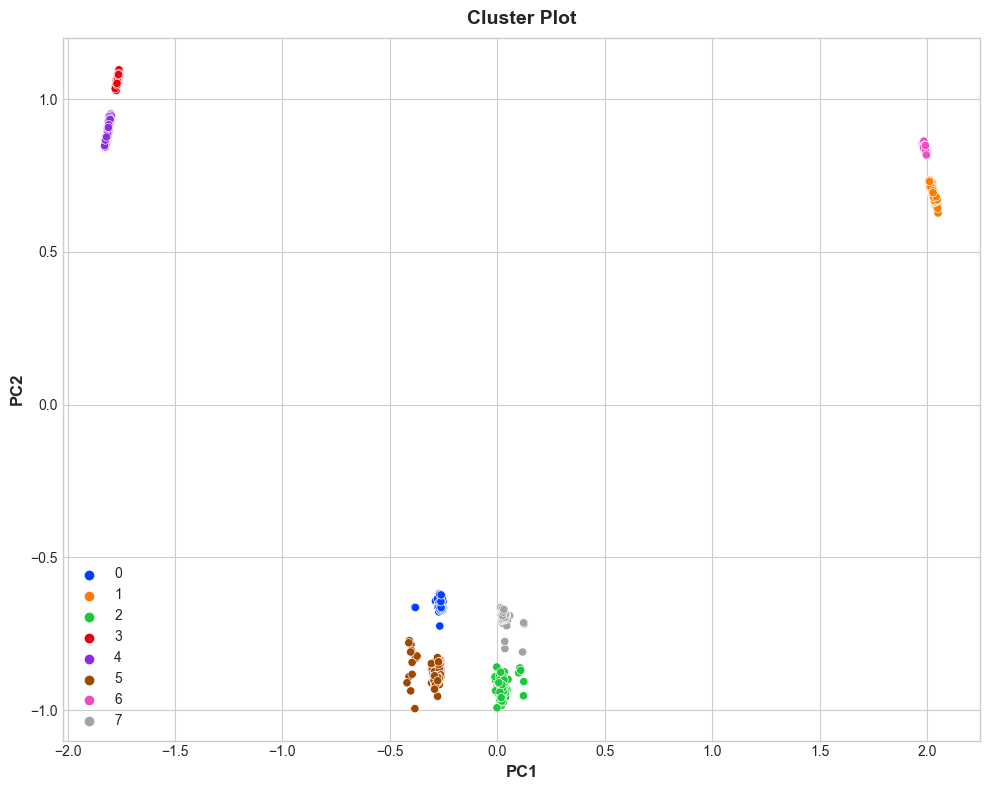

In [140]:
plot_clusters(kmeans, X_pca)

# Freezer Recommendation

In [141]:
#Create a new dataframe by merging dataframe 4 with kmens_pred
ClustereData = pd.concat([CombinedData_clean_3, pd.DataFrame({'Cluster':kmeans_pred})], axis=1)
ClustereData.head()

,Outlet_ID,week_skew,no_units_mean,volume_mode,total_sales,total_volume,total_volume_mean,price_max,price_mean,total_price_mean,...,product_name_ChocolateFudgeBigScoop_max,product_name_ChocolatePetiteBar_max,product_name_CookiesandCreamMegaTub_max,product_name_MintBitesizePop_max,product_name_MintChocolateChipFamilyPack_max,product_name_MooseTracksJumboCup_max,product_name_RockyRoadMegaTub_max,product_name_StrawberryTinyCup_max,product_name_VanillaMiniCone_max,Cluster
0,ID1008,0.050093,589.321429,0.2,3290990.0,11.2,117.864286,110.0,99.642857,58767.678571,...,0,1,0,1,0,0,0,1,1,1
1,ID1012,0.004224,60.648148,1.0,3648650.0,54.0,60.648148,1200.0,1112.962963,67567.592593,...,1,0,1,0,1,1,1,0,0,3
2,ID1024,-0.034795,126.236364,1.0,7726300.0,55.0,126.236364,1200.0,1110.909091,140478.181818,...,1,0,1,0,1,1,1,0,0,4
3,ID1029,0.000406,472.519231,0.2,13401160.0,60.0,158.826923,1200.0,575.096154,128857.307692,...,1,1,1,1,1,1,1,1,1,2
4,ID1036,0.071437,287.743119,0.2,6338870.0,64.2,80.748624,1200.0,590.825688,58154.770642,...,1,1,1,1,1,1,1,1,1,7


In [66]:
def clean_data(ClustereData):
    # Performed 13 aggregations grouped on column: 'Cluster'
    ClustereData = ClustereData.groupby(['Cluster']).agg(total_sales_mean=('total_sales', 'mean'), total_volume_mean=('total_volume', 'mean'), areasqft_mode_mean=('areasqft_mean', 'mean'), Cluster_count=('Cluster', 'count'), product_name_ButterPecanSmallStick_max_sum=('product_name_ButterPecanSmallStick_max', 'sum'), product_name_ChocolateFudgeBigScoop_max_sum=('product_name_ChocolateFudgeBigScoop_max', 'sum'), product_name_CookiesandCreamMegaTub_max_sum=('product_name_CookiesandCreamMegaTub_max', 'sum'), product_name_MintBitesizePop_max_sum=('product_name_MintBitesizePop_max', 'sum'), product_name_MintChocolateChipFamilyPack_max_sum=('product_name_MintChocolateChipFamilyPack_max', 'sum'), product_name_MooseTracksJumboCup_max_sum=('product_name_MooseTracksJumboCup_max', 'sum'), product_name_RockyRoadMegaTub_max_sum=('product_name_RockyRoadMegaTub_max', 'sum'), product_name_StrawberryTinyCup_max_sum=('product_name_StrawberryTinyCup_max', 'sum'), product_name_VanillaMiniCone_max_sum=('product_name_VanillaMiniCone_max', 'sum')).reset_index()
    return ClustereData

ClustereData_clean = clean_data(ClustereData.copy())

In [142]:
ClustereData_clean.head(10)

,Cluster,total_sales_mean,total_volume_mean,areasqft_mode_mode,Cluster_count,product_name_ButterPecanSmallStick_max_sum,product_name_ChocolateFudgeBigScoop_max_sum,product_name_CookiesandCreamMegaTub_max_sum,product_name_MintBitesizePop_max_sum,product_name_MintChocolateChipFamilyPack_max_sum,product_name_MooseTracksJumboCup_max_sum,product_name_RockyRoadMegaTub_max_sum,product_name_StrawberryTinyCup_max_sum,product_name_VanillaMiniCone_max_sum,maximum_ROI,maximum_ROI_freezer,maximum_item_sales_ratio
0,0,6.528281e+06,71.930769,2410.0,104,104,104,104,104,104,104,104,104,104,2040.087740,CoolTech,0.599423
1,1,3.593086e+06,11.049697,3886.0,165,165,0,0,165,0,0,0,165,165,2245.678826,FreezeTech 3.0,0.441988
2,2,1.559540e+07,72.855484,7931.0,155,155,155,155,155,155,155,155,155,155,4873.563891,CoolTech,0.607129
3,3,3.592479e+06,54.270000,1931.0,100,0,100,100,0,100,100,100,0,0,1197.493000,FreezeTech,0.542700
4,4,7.589888e+06,55.240310,3127.0,129,0,129,129,0,129,129,129,0,0,2529.962791,FreezeTech,0.552403
5,5,1.754092e+07,90.470833,7058.0,144,144,144,144,144,144,144,144,144,144,5011.691091,IceBlast Pro,0.603139
6,6,2.014810e+06,10.700000,1721.0,70,70,0,0,70,0,0,0,70,70,1259.256071,FreezeTech 3.0,0.428000
7,7,6.543024e+06,68.623810,1761.0,84,84,84,84,84,84,84,84,84,84,2044.695052,CoolTech,0.571865


In [143]:
#drop the column maximum_item_sales_ratio_freezer

ClustereData_clean.drop(['maximum_item_sales_ratio_freezer'], axis=1, inplace=True)

KeyError: "['maximum_item_sales_ratio_freezer'] not found in axis"

ValueError: Could not interpret input 'areasqft_mean'

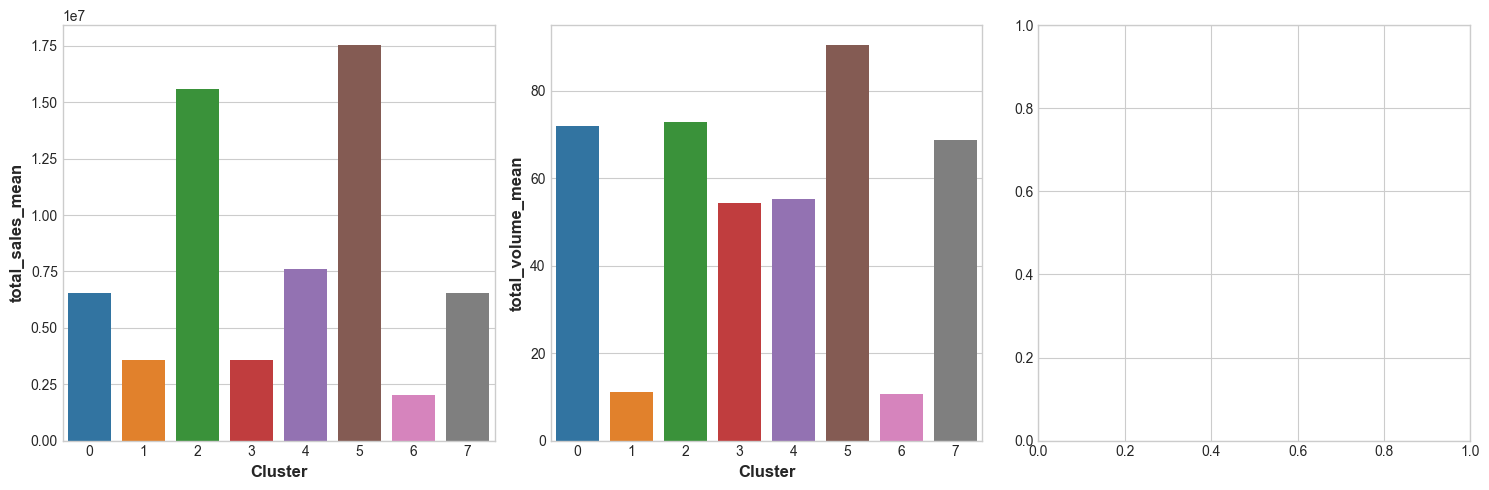

In [144]:
#plot all 4 variables
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(x='Cluster', y='total_sales_mean', data=ClustereData_clean, ax=axs[0])
sns.barplot(x='Cluster', y='total_volume_mean', data=ClustereData_clean, ax=axs[1])
sns.barplot(x='Cluster', y='areasqft_mean', data=ClustereData_clean, ax=axs[2])
fig.suptitle('Cluster Analysis', fontsize=16)

In [145]:
FreezerData.head()

,Freezer Name,Model Number,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours
0,ChillMaster,M001,55,2500
1,FreezeZone,M002,75,2800
2,CoolTech,M003,120,3200
3,mini CoolTech,M004,30,1800
4,IceBlast Pro,M005,150,3500


In [147]:
ClustereData_clean.head()

,Cluster,total_sales_mean,total_volume_mean,areasqft_mode_mode,Cluster_count,product_name_ButterPecanSmallStick_max_sum,product_name_ChocolateFudgeBigScoop_max_sum,product_name_CookiesandCreamMegaTub_max_sum,product_name_MintBitesizePop_max_sum,product_name_MintChocolateChipFamilyPack_max_sum,product_name_MooseTracksJumboCup_max_sum,product_name_RockyRoadMegaTub_max_sum,product_name_StrawberryTinyCup_max_sum,product_name_VanillaMiniCone_max_sum,maximum_ROI,maximum_ROI_freezer,maximum_item_sales_ratio
0,0,6.528281e+06,71.930769,2410.0,104,104,104,104,104,104,104,104,104,104,2040.087740,CoolTech,0.599423
1,1,3.593086e+06,11.049697,3886.0,165,165,0,0,165,0,0,0,165,165,2245.678826,FreezeTech 3.0,0.441988
2,2,1.559540e+07,72.855484,7931.0,155,155,155,155,155,155,155,155,155,155,4873.563891,CoolTech,0.607129
3,3,3.592479e+06,54.270000,1931.0,100,0,100,100,0,100,100,100,0,0,1197.493000,FreezeTech,0.542700
4,4,7.589888e+06,55.240310,3127.0,129,0,129,129,0,129,129,129,0,0,2529.962791,FreezeTech,0.552403


In [98]:
ClustereData_clean.to_csv('ClustereData_clean.csv', index=False)

In [148]:
#create new features from the FreezerData dataframe
#for each each cluster calculate the ratios of ROI = total_sales_mean/(freezer_cost + maintance_cost) and item sales ratio = total_volume_mean/(freezer capacity)

# make columns from all freezer types

for index, row in ClustereData_clean.iterrows():
    
    max_ROI = 0
    max_ROI_freezer = ""
    max_item_sales_ratio = 0
    max_item_sales_ratio_freezer = ""
    
    for index2, row2 in FreezerData.iterrows():
        freezer_name = row2['Freezer Name']
        model_number = row2['Model Number']
        capacity = row2['Volume Capacity (Liters)']
        cost = row2['Power and maitainance Cost (LKR) per 100 hours']
        
        if row['total_volume_mean']*2.5> capacity > row['total_volume_mean']*1.5:
            #if max_ROI is greater than the current ROI, replace the max_ROI with the current ROI
            if max_ROI < row['total_sales_mean']/(cost):
                max_ROI = row['total_sales_mean']/(cost)
                max_ROI_freezer = freezer_name
            if max_item_sales_ratio < row['total_volume_mean']/(capacity):
                max_item_sales_ratio = row['total_volume_mean']/(capacity)
                max_item_sales_ratio_freezer = freezer_name
                
        # add a new column to ClustereData_clean dataframe and add this value to that row
    ClustereData_clean.loc[index, 'maximum_ROI'] = max_ROI
    ClustereData_clean.loc[index, 'maximum_ROI_freezer'] = max_ROI_freezer
    ClustereData_clean.loc[index, 'maximum_item_sales_ratio'] = max_item_sales_ratio
    ClustereData_clean.loc[index, 'maximum_item_sales_ratio_freezer'] = max_item_sales_ratio_freezer        


In [149]:
ClustereData_clean.head(10)

,Cluster,total_sales_mean,total_volume_mean,areasqft_mode_mode,Cluster_count,product_name_ButterPecanSmallStick_max_sum,product_name_ChocolateFudgeBigScoop_max_sum,product_name_CookiesandCreamMegaTub_max_sum,product_name_MintBitesizePop_max_sum,product_name_MintChocolateChipFamilyPack_max_sum,product_name_MooseTracksJumboCup_max_sum,product_name_RockyRoadMegaTub_max_sum,product_name_StrawberryTinyCup_max_sum,product_name_VanillaMiniCone_max_sum,maximum_ROI,maximum_ROI_freezer,maximum_item_sales_ratio,maximum_item_sales_ratio_freezer
0,0,6.528281e+06,71.930769,2410.0,104,104,104,104,104,104,104,104,104,104,2040.087740,CoolTech,0.599423,CoolTech
1,1,3.593086e+06,11.049697,3886.0,165,165,0,0,165,0,0,0,165,165,2245.678826,FreezeTech 3.0,0.441988,FreezeTech 3.0
2,2,1.559540e+07,72.855484,7931.0,155,155,155,155,155,155,155,155,155,155,4873.563891,CoolTech,0.607129,CoolTech
3,3,3.592479e+06,54.270000,1931.0,100,0,100,100,0,100,100,100,0,0,1197.493000,FreezeTech,0.542700,FreezeTech
4,4,7.589888e+06,55.240310,3127.0,129,0,129,129,0,129,129,129,0,0,2529.962791,FreezeTech,0.552403,FreezeTech
5,5,1.754092e+07,90.470833,7058.0,144,144,144,144,144,144,144,144,144,144,5011.691091,IceBlast Pro,0.603139,IceBlast Pro
6,6,2.014810e+06,10.700000,1721.0,70,70,0,0,70,0,0,0,70,70,1259.256071,FreezeTech 3.0,0.428000,FreezeTech 3.0
7,7,6.543024e+06,68.623810,1761.0,84,84,84,84,84,84,84,84,84,84,2044.695052,CoolTech,0.571865,CoolTech


since they both appear to be the same we can consider only 1  column

In [150]:
def clean_data(ClustereData_clean):
    # Drop column: 'maximum_item_sales_ratio_freezer'
    ClustereData_clean = ClustereData_clean.drop(columns=['maximum_item_sales_ratio_freezer'])
    # Rename column 'maximum_ROI_freezer' to 'Recommended_freezer'
    ClustereData_clean = ClustereData_clean.rename(columns={'maximum_ROI_freezer': 'Recommended_freezer'})
    return ClustereData_clean

ClustereData_clean_1 = clean_data(ClustereData_clean.copy())
ClustereData_clean_1.head()

,Cluster,total_sales_mean,total_volume_mean,areasqft_mode_mode,Cluster_count,product_name_ButterPecanSmallStick_max_sum,product_name_ChocolateFudgeBigScoop_max_sum,product_name_CookiesandCreamMegaTub_max_sum,product_name_MintBitesizePop_max_sum,product_name_MintChocolateChipFamilyPack_max_sum,product_name_MooseTracksJumboCup_max_sum,product_name_RockyRoadMegaTub_max_sum,product_name_StrawberryTinyCup_max_sum,product_name_VanillaMiniCone_max_sum,maximum_ROI,Recommended_freezer,maximum_item_sales_ratio
0,0,6.528281e+06,71.930769,2410.0,104,104,104,104,104,104,104,104,104,104,2040.087740,CoolTech,0.599423
1,1,3.593086e+06,11.049697,3886.0,165,165,0,0,165,0,0,0,165,165,2245.678826,FreezeTech 3.0,0.441988
2,2,1.559540e+07,72.855484,7931.0,155,155,155,155,155,155,155,155,155,155,4873.563891,CoolTech,0.607129
3,3,3.592479e+06,54.270000,1931.0,100,0,100,100,0,100,100,100,0,0,1197.493000,FreezeTech,0.542700
4,4,7.589888e+06,55.240310,3127.0,129,0,129,129,0,129,129,129,0,0,2529.962791,FreezeTech,0.552403


In [164]:
# merge the freezer volume capacity column with the ClustereData_clean_1 dataframe

ClustereData_clean_1 = pd.merge(ClustereData_clean_1, FreezerData[['Freezer Name', 'Volume Capacity (Liters)']], how='left', left_on='Recommended_freezer', right_on='Freezer Name')

In [166]:
ClustereData_clean_1.to_csv('ClustereData_clean_1.csv', index=False)

# Add new data

In [152]:
#read the dataframe in new path

path = "./Resources/Datasets/Finals/"

SalesDataNew = pd.read_csv(path + 'sales_data.csv')
ProductDataNew = pd.read_csv(path + 'product_data.csv')

In [153]:
ProductDataNew.head()

,pid,volume,product_name,price,cost,stock
0,IP3,0.2,Strawberry Tiny Cup,110,98.45,225000
1,IP2,0.2,Chocolate Petite Bar,90,79.2,75000
2,IP1,0.2,Vanilla Mini Cone,100,89,120000
3,IP5,0.2,Butter Pecan Small Stick,100,88.5,150000
4,IP4,0.2,Mint Bite-size Pop,100,89.5,200000


In [154]:
def clean_data(ProductDataNew):
    # Change column type to float64 for column: 'price'
    ProductDataNew = ProductDataNew.astype({'price': 'float64'})
    # Change column type to float64 for column: 'stock'
    ProductDataNew = ProductDataNew.astype({'stock': 'float64'})
    # Replace all instances of "," with "" in column: ' cost '
    ProductDataNew[' cost '] = ProductDataNew[' cost '].str.replace(",", "", regex=False)
    # Change column type to float64 for column: ' cost '  
    ProductDataNew = ProductDataNew.astype({' cost ': 'float64'})
    # Calculate the margin for each product
    ProductDataNew['margin'] = ProductDataNew['price'] - ProductDataNew[' cost ']
    # Calculate the margin per volume
    ProductDataNew['margin_per_volume'] = ProductDataNew['margin']/ProductDataNew['volume']
    return ProductDataNew

ProductDataNew_clean = clean_data(ProductDataNew.copy())
ProductDataNew_clean.head()

,pid,volume,product_name,price,cost,stock,margin,margin_per_volume
0,IP3,0.2,Strawberry Tiny Cup,110.0,98.45,225000.0,11.55,57.75
1,IP2,0.2,Chocolate Petite Bar,90.0,79.20,75000.0,10.80,54.00
2,IP1,0.2,Vanilla Mini Cone,100.0,89.00,120000.0,11.00,55.00
3,IP5,0.2,Butter Pecan Small Stick,100.0,88.50,150000.0,11.50,57.50
4,IP4,0.2,Mint Bite-size Pop,100.0,89.50,200000.0,10.50,52.50


In [155]:
# rank the products according to their margin

ProductDataNew_clean['margin_rank'] = ProductDataNew_clean['margin'].rank(ascending=False).astype(int)

In [156]:
ProductDataNew_clean.head()

,pid,volume,product_name,price,cost,stock,margin,margin_per_volume,margin_rank
0,IP3,0.2,Strawberry Tiny Cup,110.0,98.45,225000.0,11.55,57.75,6
1,IP2,0.2,Chocolate Petite Bar,90.0,79.20,75000.0,10.80,54.00,9
2,IP1,0.2,Vanilla Mini Cone,100.0,89.00,120000.0,11.00,55.00,8
3,IP5,0.2,Butter Pecan Small Stick,100.0,88.50,150000.0,11.50,57.50,7
4,IP4,0.2,Mint Bite-size Pop,100.0,89.50,200000.0,10.50,52.50,10


In [157]:
SalesDataNew.head()

,Row Labels,Sum of total vlume,Sum of total sales,rank
0,IP3,1036253.2,113987852,1
1,IP2,1030783.2,92770488,2
2,IP1,1023574.2,102357420,3
3,IP5,1022602.4,102260240,4
4,IP4,1017999.0,101799900,5


In [158]:
#create a rank according to total sales

SalesDataNew['total_sales_rank'] = SalesDataNew['Sum of total sales'].rank(ascending=False).astype(int)

In [159]:
SalesDataNew.head()

,Row Labels,Sum of total vlume,Sum of total sales,rank,total_sales_rank
0,IP3,1036253.2,113987852,1,6
1,IP2,1030783.2,92770488,2,10
2,IP1,1023574.2,102357420,3,7
3,IP5,1022602.4,102260240,4,8
4,IP4,1017999.0,101799900,5,9


In [160]:
#rename rank to total_volume_rank

SalesDataNew = SalesDataNew.rename(columns={'rank': 'total_volume_rank'})

In [161]:
#merge the two dataframes

MergedItemData = pd.merge(ProductDataNew_clean, SalesDataNew, left_on='pid', right_on='Row Labels')

In [162]:
MergedItemData.head()

,pid,volume,product_name,price,cost,stock,margin,margin_per_volume,margin_rank,Row Labels,Sum of total vlume,Sum of total sales,total_volume_rank,total_sales_rank
0,IP3,0.2,Strawberry Tiny Cup,110.0,98.45,225000.0,11.55,57.75,6,IP3,1036253.2,113987852,1,6
1,IP2,0.2,Chocolate Petite Bar,90.0,79.20,75000.0,10.80,54.00,9,IP2,1030783.2,92770488,2,10
2,IP1,0.2,Vanilla Mini Cone,100.0,89.00,120000.0,11.00,55.00,8,IP1,1023574.2,102357420,3,7
3,IP5,0.2,Butter Pecan Small Stick,100.0,88.50,150000.0,11.50,57.50,7,IP5,1022602.4,102260240,4,8
4,IP4,0.2,Mint Bite-size Pop,100.0,89.50,200000.0,10.50,52.50,10,IP4,1017999.0,101799900,5,9


In [169]:
# Create new columns called percentage_margin and total_sales_margin

MergedItemData['percentage_margin'] = MergedItemData['margin']/MergedItemData['price']
MergedItemData['total_sales_margin'] = MergedItemData['Sum of total sales']*MergedItemData['percentage_margin']

# Create a new column rank for total_sales_margin
MergedItemData['total_sales_margin_rank'] = MergedItemData['total_sales_margin'].rank(ascending=False).astype(int)

In [170]:
MergedItemData.head()

,pid,volume,product_name,price,cost,stock,margin,margin_per_volume,margin_rank,Row Labels,Sum of total vlume,Sum of total sales,total_volume_rank,total_sales_rank,percentage_margin,total_sales_margin,total_sales_margin_rank
0,IP3,0.2,Strawberry Tiny Cup,110.0,98.45,225000.0,11.55,57.75,6,IP3,1036253.2,113987852,1,6,0.105,11968724.46,6
1,IP2,0.2,Chocolate Petite Bar,90.0,79.20,75000.0,10.80,54.00,9,IP2,1030783.2,92770488,2,10,0.120,11132458.56,9
2,IP1,0.2,Vanilla Mini Cone,100.0,89.00,120000.0,11.00,55.00,8,IP1,1023574.2,102357420,3,7,0.110,11259316.20,8
3,IP5,0.2,Butter Pecan Small Stick,100.0,88.50,150000.0,11.50,57.50,7,IP5,1022602.4,102260240,4,8,0.115,11759927.60,7
4,IP4,0.2,Mint Bite-size Pop,100.0,89.50,200000.0,10.50,52.50,10,IP4,1017999.0,101799900,5,9,0.105,10688989.50,10


In [171]:
MergedItemData.to_csv('MergedItemData.csv', index=False)